In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 



In [27]:
# Завантаження файлу
file_path = '2017_jun_final - 2017_jun_final.csv' 
df = pd.read_csv(file_path)
# Читаємо отриману таблицю, використовуючи метод head 
print("--- Перші 5 рядків (head) ---")
print(df.head())


--- Перші 5 рядків (head) ---
   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430           

In [28]:
# Визначаємо розмір таблиці за допомогою методу shape
print("\n--- Розмір таблиці (shape) до очищення ---")
print(df.shape)


--- Розмір таблиці (shape) до очищення ---
(8704, 25)


In [29]:
print("--- Типи даних стовпців (dtypes) ---")
print(df.dtypes)

--- Типи даних стовпців (dtypes) ---
N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     flo

In [30]:
# Рахуємо відсоток пропусків для кожної колонки
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("\n--- Відсоток пропусків у кожній колонці (%) ---")
print(missing_percentage)


--- Відсоток пропусків у кожній колонці (%) ---
N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                            

In [31]:
# Визначаємо колонки, які містять пропуски (відсоток > 0), крім 'Мова програмування'
# Використовуємо .index.tolist() для отримання їхніх назв
columns_to_drop = missing_percentage[
    (missing_percentage > 0) & (missing_percentage.index != 'Мова програмування')
].index.tolist()

In [32]:
# Видаляємо визначені колонки. axis=1 вказує на видалення стовпців.
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"Видалено колонки: {columns_to_drop}")
print(f"Новий розмір таблиці: {df.shape}")

Видалено колонки: ['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']
Новий розмір таблиці: (8704, 20)


In [33]:
# Знову порахуємо частку пропусків 
print("\n--- Перевірка пропусків після видалення стовпців ---")
print((df.isnull().sum() / len(df)) * 100)


--- Перевірка пропусків після видалення стовпців ---
N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [34]:
# Оскільки NaN залишились тільки в колонці "Мова програмування", ми видаляємо всі записи без мови.
df.dropna(inplace=True)


In [35]:
# Визначаємо новий розмір таблиці
print("\n--- Розмір таблиці після видалення рядків (dropna) ---")
print(df.shape)


--- Розмір таблиці після видалення рядків (dropna) ---
(4854, 20)


In [36]:
# Створення DataFrame лише для спеціалістів Python
python_data = df[df['Мова програмування'] == 'Python']
# Визначаємо розмір таблиці python_data
print("\n--- Розмір таблиці з розробниками Python (python_data.shape) ---")
print(python_data.shape)


--- Розмір таблиці з розробниками Python (python_data.shape) ---
(207, 20)


In [37]:
# Групуємо таблицю python_data за стовпцем 'Посада'
grouped_data = python_data.groupby('Посада')

# Застосовуємо агрегаційну функцію agg, щоб знайти мінімальне та максимальне 
# значення у стовпці 'Зарплата на місяць' для кожної групи.
salary_stats = grouped_data['Зарплата на місяць'].agg(['min', 'max'])

print("--- Мінімальна та Максимальна Зарплата за Посадою ---")
print(salary_stats)

--- Мінімальна та Максимальна Зарплата за Посадою ---
                           min   max
Посада                              
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


In [38]:
# Створюємо функцію, яка обчислює середнє з мінімального та максимального значень
def fill_avg_salary(row):
    """
    Обчислює середнє арифметичне значення між 'min' та 'max' зарплатами в рядку.
    """
    return (row['min'] + row['max']) / 2
# Застосовуємо функцію fill_avg_salary до кожного рядка (axis=1) DataFrame salary_stats
salary_stats['avg'] = salary_stats.apply(fill_avg_salary, axis=1)

print("--- DataFrame salary_stats з новим стовпчиком 'avg' ---")
print(salary_stats)


--- DataFrame salary_stats з новим стовпчиком 'avg' ---
                           min   max     avg
Посада                                      
Junior Software Engineer   100  1250   675.0
Senior Software Engineer  1300  9200  5250.0
Software Engineer          500  5400  2950.0
System Architect          3000  5000  4000.0
Technical Lead            1425  6200  3812.5


In [39]:
# Описова статистика для новоствореного стовпчика "avg"
avg_salary_description = salary_stats['avg'].describe()

print("\n--- Описова статистика для стовпчика 'avg' ---")
print(avg_salary_description)


--- Описова статистика для стовпчика 'avg' ---
count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [40]:
# Збереження оновленої таблиці salary_stats у новий CSV файл
salary_stats.to_csv('python_salary_summary.csv')

print("\n--- Файл 'python_salary_summary.csv' успішно збережено! ---")


--- Файл 'python_salary_summary.csv' успішно збережено! ---


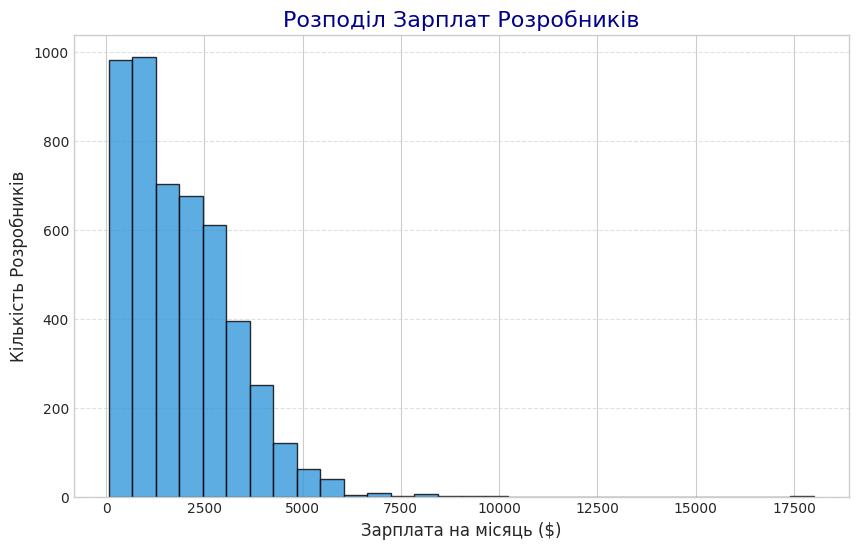

In [41]:
# --- Графік 1: Розподіл Зарплат (Базова Гістограма з Matplotlib) ---
plt.figure(figsize=(10, 6))
# Використовуємо стовпчик 'Зарплата на місяць'
plt.hist(df['Зарплата на місяць'], bins=30, color='#3498db', edgecolor='black', alpha=0.8)
plt.title('Розподіл Зарплат Розробників', fontsize=16, color='darkblue')
plt.xlabel('Зарплата на місяць ($)', fontsize=12)
plt.ylabel('Кількість Розробників', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.style.use('default') # Скидаємо стиль, щоб наступні були унікальні
plt.show()

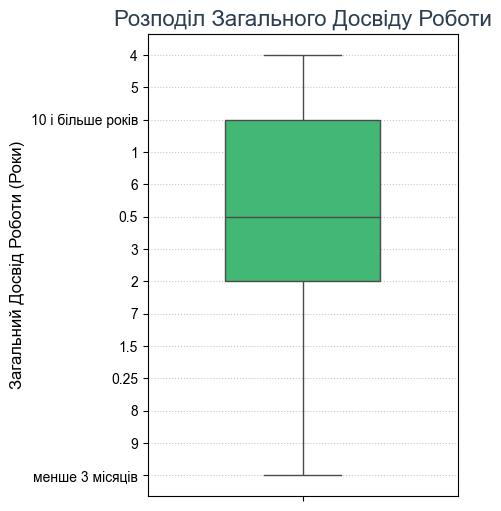

In [42]:
# --- Графік 2: Розподіл Досвіду Роботи (Box Plot з Seaborn) ---
plt.figure(figsize=(4, 6))
# Box plot ідеально підходить для візуалізації медіани та викидів
sns.boxplot(y=df['Загальний досвід роботи'], color='#2ecc71', width=0.5)
plt.title('Розподіл Загального Досвіду Роботи', fontsize=16, color='#2c3e50')
plt.ylabel('Загальний Досвід Роботи (Роки)', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.style.use('seaborn-v0_8-whitegrid') # Унікальний сітчастий стиль
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12136\2378599618.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(top_positions))


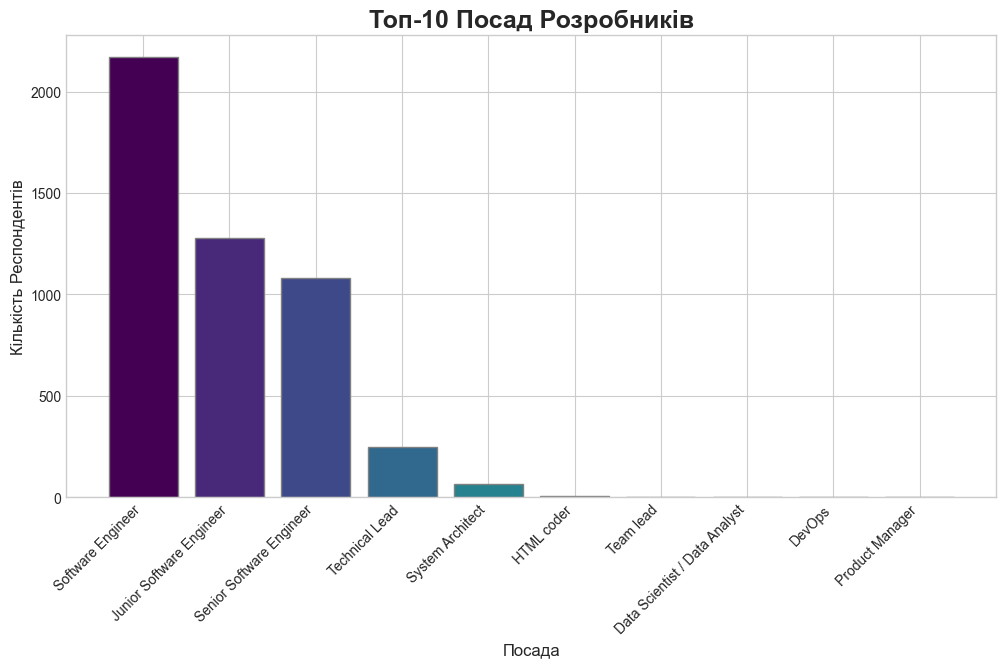

In [44]:
# --- Графік 3: Кількість Респондентів за Посадою (Bar Plot з Matplotlib) ---
# Обмежуємося топ-10 посадами для кращої візуалізації
top_positions = df['Посада'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
# Створюємо унікальну кольорову палітру
colors = plt.cm.get_cmap('viridis', len(top_positions)) 
bars = plt.bar(top_positions.index, top_positions.values, color=colors.colors, edgecolor='grey')
plt.title('Топ-10 Посад Розробників', fontsize=18, fontweight='bold')
plt.xlabel('Посада', fontsize=12)
plt.ylabel('Кількість Респондентів', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Повертаємо підписи
plt.tick_params(axis='x', length=0) # Прибираємо рисочки по осі X
plt.style.use('fivethirtyeight') # Стиль, що нагадує FiveThirtyEight
plt.show()

